1. Visualization of D2_nn6_tri element saved as D2_nn6_tri_3gp.png


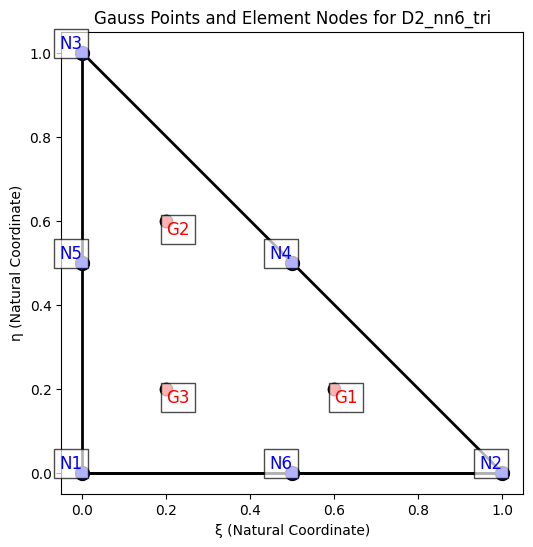

In [23]:
import discretization_demo_helper_fcns as di_demo
import numpy as np
import matplotlib.pyplot as plt

# 1. Visualize the D2_nn6_tri element with Gauss points
ele_type = "D2_nn6_tri"
num_gauss_pts = 3  # We'll use 3 Gauss points for this example
fname = "D2_nn6_tri_3gp.png"
di_demo.visualize_gauss_pts(fname, ele_type, num_gauss_pts)
print(f"1. Visualization of {ele_type} element saved as {fname}")

2. Interpolation in natural coordinates saved as D2_nn6_tri_interpolate_fcn_natural.png


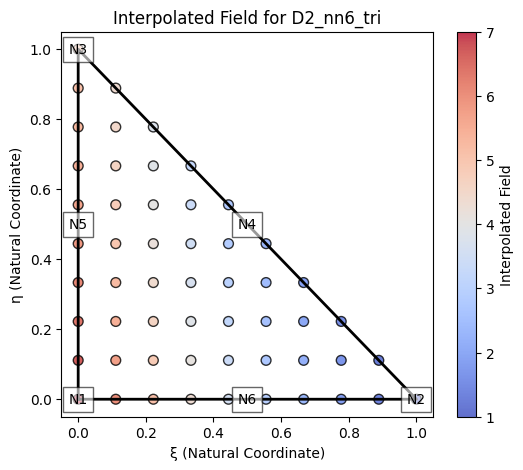

In [24]:
import discretization_demo_helper_fcns as di_demo
import numpy as np
import matplotlib.pyplot as plt

# 2. Interpolation in natural coordinates
def fcn(xi, eta):
    return 2*xi**2 + 3*eta**2 + 4*xi*eta + 2*xi + 3*eta + 1

node_coords_natural = np.array([[0, 0], [1, 0], [0, 1], [0.5, 0], [0.5, 0.5], [0, 0.5]])
node_values = np.array([fcn(xi, eta) for xi, eta in node_coords_natural])

fname = ele_type + "_interpolate_fcn_natural.png"
di_demo.plot_interpolate_field_natural_coords_single_element(fname, ele_type, node_values)
print("2. Interpolation in natural coordinates saved as", fname)

3. Isoparametric mapping visualization saved as D2_nn6_tri_interpolate_fcn_physical_coords.png


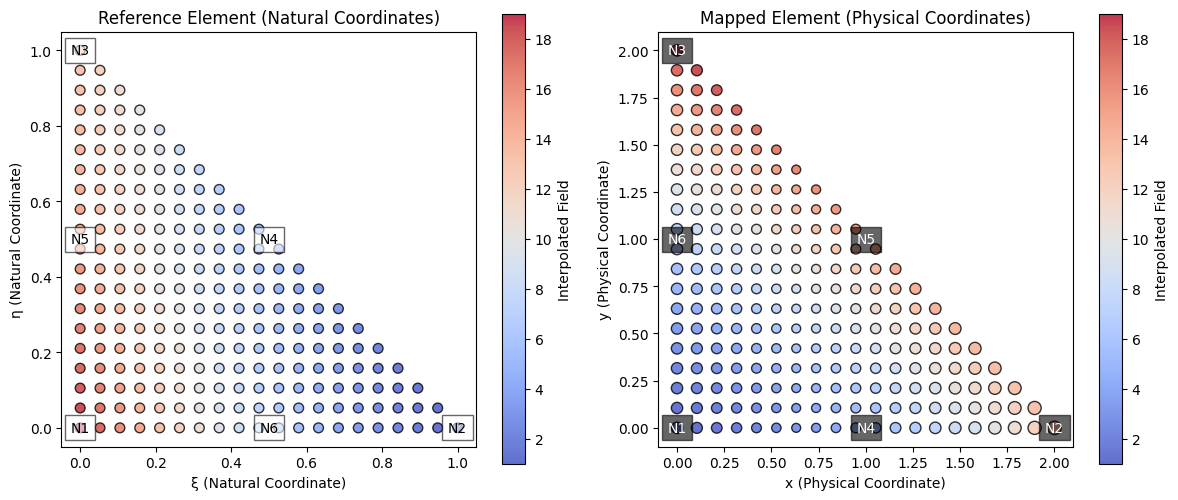

In [ ]:
import discretization_demo_helper_fcns as di_demo
import numpy as np
import matplotlib.pyplot as plt

# 3. Isoparametric mapping and interpolation in physical coordinates
def fcn_physical(x, y):
    return 2*x**2 + 3*y**2 + 4*x*y + 2*x + 3*y + 1

node_coords_physical = np.array([
    [0, 0], [2, 0], [0, 2],  # Vertices
    [1, 0], [1, 1], [0, 1]   # Mid-edge nodes
])
node_values_physical = np.array([fcn_physical(x, y) for x, y in node_coords_physical])
fname = ele_type + "_interpolate_fcn_physical_coords.png"
di_demo.visualize_isoparametric_mapping_single_element(fname, ele_type, node_coords_physical, node_values_physical)
print("3. Isoparametric mapping visualization saved as", fname)

In [26]:
import discretization_demo_helper_fcns as di_demo
import numpy as np


# 4. Gradient computation and comparison
def fcn_deriv(x, y):
    return np.array([4*x + 4*y + 2, 6*y + 4*x + 3])

xi, eta = 1/3, 1/3  # Test point in natural coordinates

# Map the test point from natural to physical coordinates
x_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords_physical[:, 0], [xi], [eta]
).flatten()[0]
y_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords_physical[:, 1], [xi], [eta]
).flatten()[0]

# Evaluate the function derivative in physical coordinates
mapped_deriv = fcn_deriv(x_mapped, y_mapped)

# Compute the numerical gradient in natural coordinates
gradient_natural = di_demo.interpolate_gradient_natural_coords_single_element(
    ele_type, node_values_physical, np.array([xi]), np.array([eta])
)

# Transform the numerical gradient to physical coordinates
gradient_physical = di_demo.transform_gradient_to_physical(
    ele_type, node_coords_physical, np.array([xi]), np.array([eta]), gradient_natural
).reshape((2,))

print("\n4. Gradient comparison at xi =", xi, ", eta =", eta)
print("   Physical coordinates: x =", x_mapped, ", y =", y_mapped)
print("   Analytical gradient:", mapped_deriv)
print("   Numerical gradient:", gradient_physical)
print("   Relative error:", np.linalg.norm(mapped_deriv - gradient_physical) / np.linalg.norm(mapped_deriv))


4. Gradient comparison at xi = 0.3333333333333333 , eta = 0.3333333333333333
   Physical coordinates: x = 0.6666666666666667 , y = 0.666666666666667
   Analytical gradient: [7.33333333 9.66666667]
   Numerical gradient: [7.33333333 9.66666667]
   Relative error: 2.639278430704453e-16


In [27]:
import discretization_demo_helper_fcns as di_demo
import numpy as np
import matplotlib.pyplot as plt

# 5. Integration of derivatives
def element_area(node_coords):
    x1, y1 = node_coords[0]
    x2, y2 = node_coords[1]
    x3, y3 = node_coords[2]
    return 0.5 * abs((x2 - x1)*(y3 - y1) - (x3 - x1)*(y2 - y1))

def integral_of_deriv(node_coords):
    area = element_area(node_coords[[0, 1, 2]])
    centroid_x = np.mean(node_coords[[0, 1, 2], 0])
    centroid_y = np.mean(node_coords[[0, 1, 2], 1])
    return np.array([
        (4*centroid_x + 4*centroid_y + 2) * area,
        (6*centroid_y + 4*centroid_x + 3) * area
    ])

# Reshape node_values_physical to be a column vector
node_values_physical_reshaped = node_values_physical.reshape(-1, 1)

# Compute numerical integral
integral_numerical = di_demo.compute_integral_of_derivative(
    ele_type, num_gauss_pts, node_coords_physical, node_values_physical_reshaped)

# Compute analytical integral
integral_analytical = integral_of_deriv(node_coords_physical)

print("\n5. Integration of derivatives:")
print("   Numerical integral:", integral_numerical.flatten())
print("   Analytical integral:", integral_analytical)
print("   Relative error:", np.linalg.norm(integral_numerical.flatten() - integral_analytical) / np.linalg.norm(integral_analytical))


5. Integration of derivatives:
   Numerical integral: [14.66666667 19.33333333]
   Analytical integral: [14.66666667 19.33333333]
   Relative error: 3.018130353397486e-16
